start: 2020/05/09 01:55:39


KeyboardInterrupt: 

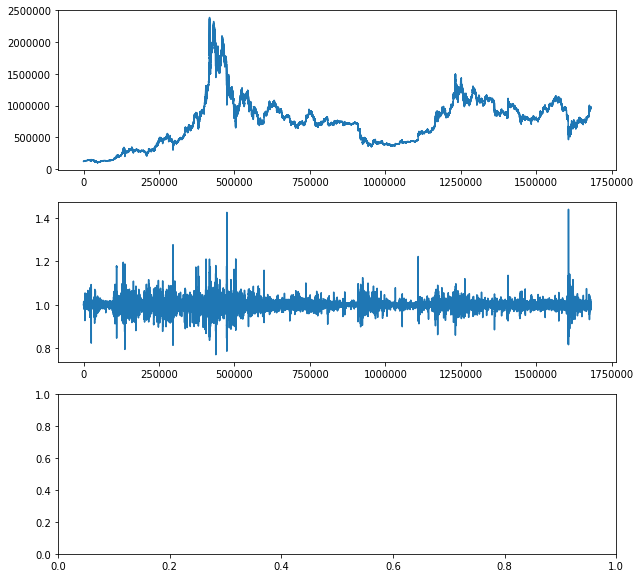

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import dataset
%matplotlib inline

def plot(data):
    x = data[:15000]
    y_close = list(x["close"])
    # y_result = list(x["result"])
    y_result = list(x["extreme60"])
    # y_action = [i > 0 for i in y_result]
    y_action = [(1 if i > 1 else -1) if i > 1.005 or i < 0.995 else 0 for i in y_result]

    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_close)
    ax2.plot(list(range(len(x))), y_result)
    ax3.scatter(list(range(len(x))), y_action, color="orange")
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

    
    # csv = pd.read_csv("datasets/candlestick2.csv")
    csv = pd.read_csv("datasets/train_v7.csv")
    # csv = csv[:15000]
    b = dataset.BitcoinDataset()
    # b.set_dataset(csv)
    b.set_dataset_for_test(csv)
    b.data.to_csv("datasets/train_v8.csv", index=False)
    plot(b.data)
    
    
    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()